In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict,cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import pickle

In [2]:
print(os.listdir("../wine-quality"))

['.git', '.ipynb_checkpoints', 'app.py', 'classification_data.pkl', 'classification_label.pkl', 'classification_model.pkl', 'classification_test_data.pkl', 'classification_test_label.pkl', 'Combine_Of_XGBOOST_NN.ipynb', 'regression_data.pkl', 'regression_label.pkl', 'regression_model.pkl', 'regression_test_data.pkl', 'regression_test_label.pkl', 'train.ipynb', 'winequality-red.csv']


IMPORTING DATA

In [3]:
data = pd.read_csv(".\winequality-red.csv")

In [4]:
data.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing values. <br>
Then, let drop duplicates.

In [7]:
data = data.drop_duplicates()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [10]:
quality = data["quality"]
quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

As we can see, there is an imbalance problem in data. Most of them are 5 6 or 7.

GRAPHS

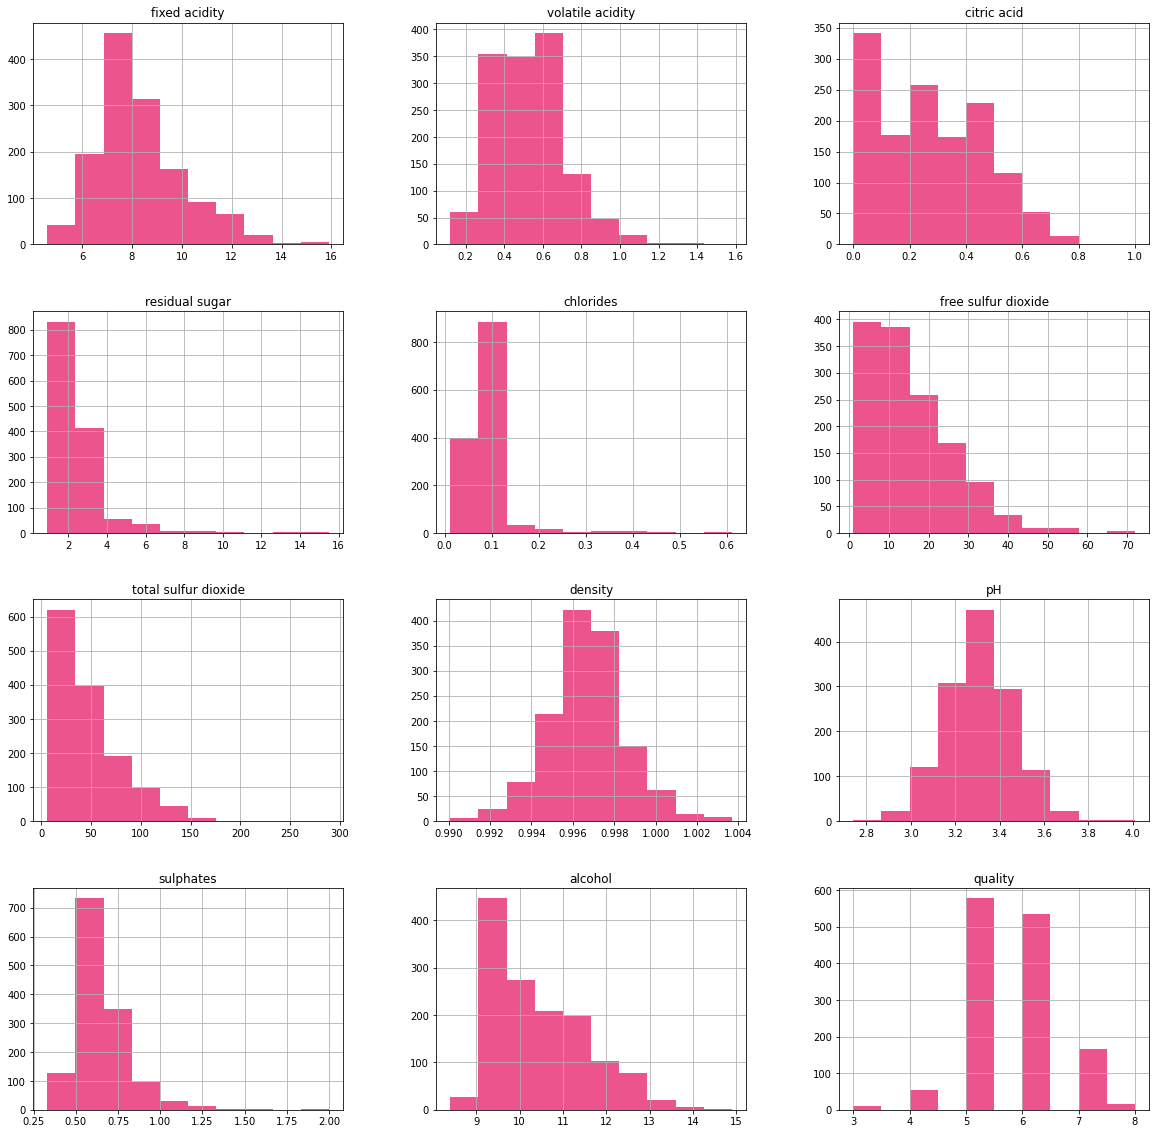

In [11]:
data.hist(figsize=(20,20), color = "#EB548C")
plt.show()

1) Most of the values ​​of the "fixed_acidity" variable are in the range of 7- 9 <br>
2) Most of the values ​​of the "volatile_acidity" variable are in the range of 0.3- 0.7 <br>
3) Most of the values ​​of the "citric_acid" variable are in the range of 0-0.1 <br>
4) Most of the values ​​of the "residual_sugar" variable are in the range of 0.9-2.2 <br>
5) Most of the values ​​of the "chlorides" variable are in the range of 0.08-0.12 <br>
6) Most of the values ​​of the "free_sulfur_dioxide" variable are in the range of 0-15 <br>
7) Most of the values ​​of the "total_sulfur_dioxide" variable are in the range of 5-30 <br>
8) Most of the values ​​of the "density" variable are in the range of 0.996-0.998 <br>
5) Most of the values ​​of the "pH" variable are in the range of 3.2-3.4 <br>
6) Most of the values ​​of the "sulphates" variable are in the range of 0.5-0.7 <br>
7) Most of the values ​​of the "alcohol" variable are in the range of 9-10 <br>
8) Most of the values ​​of the "quality" variable are 5-7 <br>

Most features have a certain agglomeration value. Because of that, we have to use some scaler points and feature engineering.

In [12]:
data_corr = data.copy()
correlations = data_corr.corr()['quality'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(6))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 residual sugar    0.013640
fixed acidity     0.119024
citric acid       0.228057
sulphates         0.248835
alcohol           0.480343
quality           1.000000
Name: quality, dtype: float64

Most Negative Correlations: 
 volatile acidity       -0.395214
density                -0.184252
total sulfur dioxide   -0.177855
chlorides              -0.130988
pH                     -0.055245
Name: quality, dtype: float64


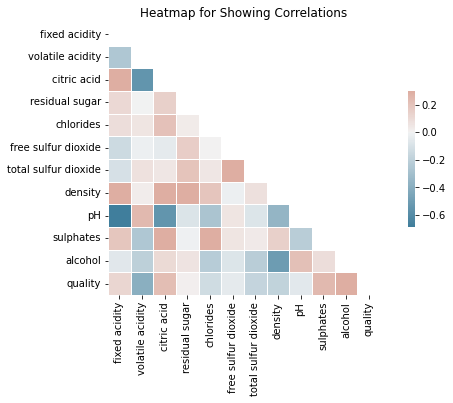

In [13]:
corr = data_corr.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap for Showing Correlations');

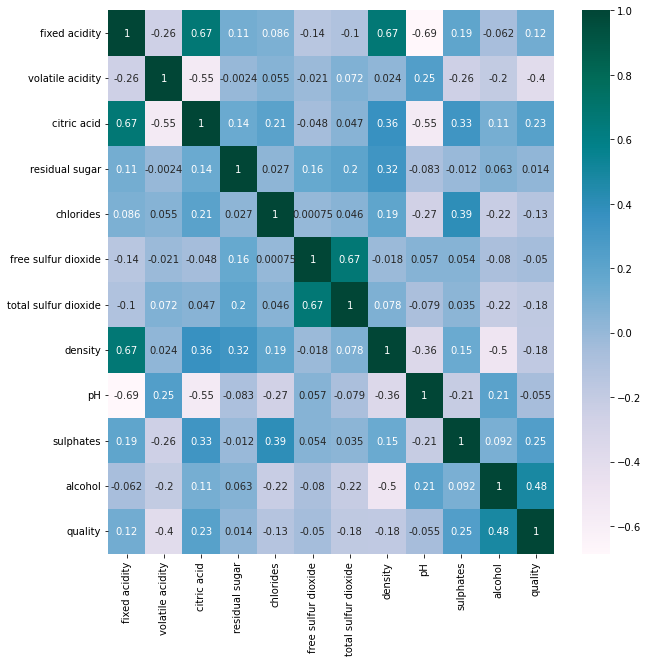

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(corr,annot=True, cmap= 'PuBuGn');

Depend on heatmap we can see there are some strong relations between pH and fixed acidity, pH and citric acid, citric acid and volatile acidity,alcohol and density.

In [15]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


With that table, we can detect anomaly values of features. For example, a wine type cannot have a pH less than 1. But some of them maybe have wrong values.

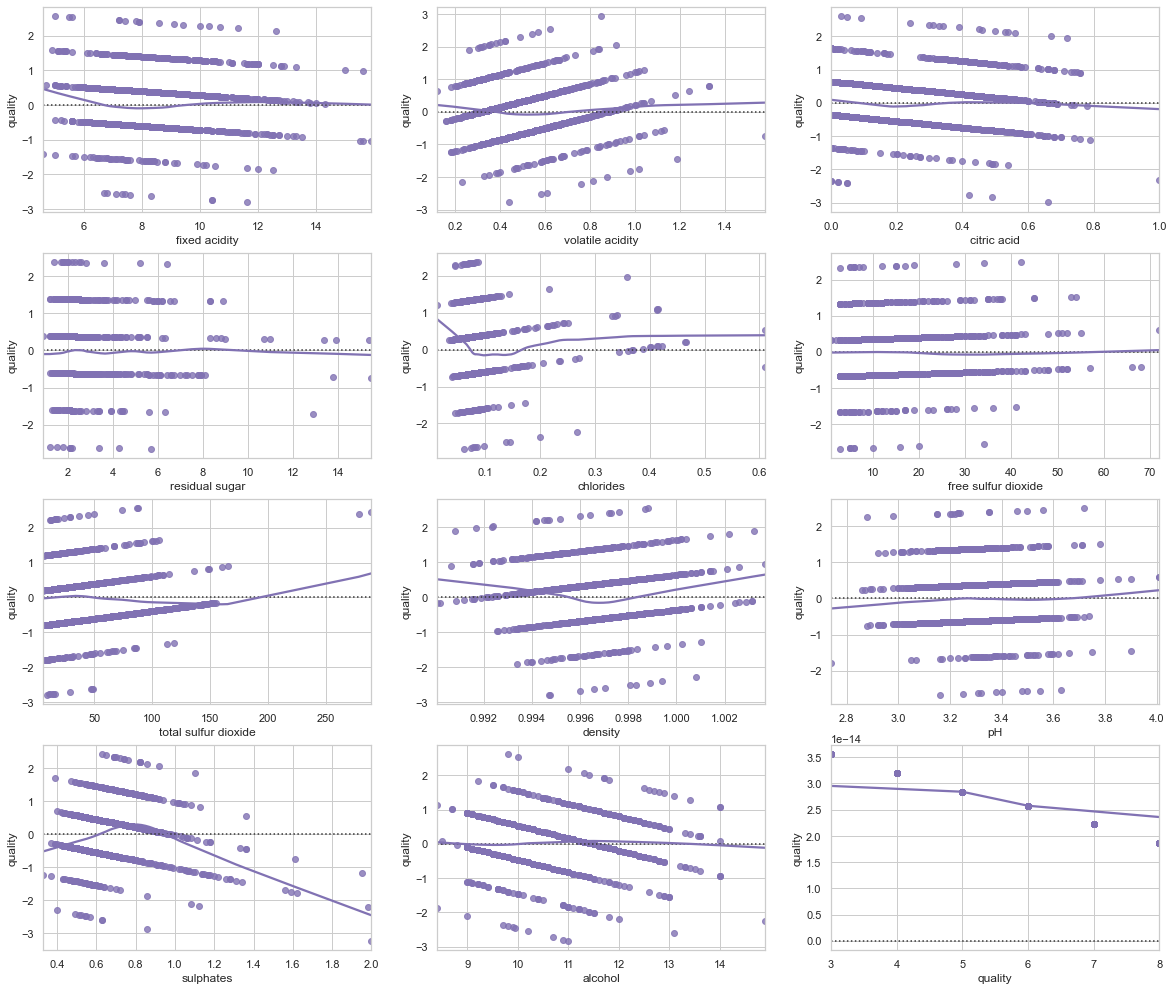

In [16]:
fig = plt.figure(figsize = (20, 40))
sns.set_theme(style="whitegrid")
for i in range(len(data.columns.tolist())):
    fig.add_subplot(9,3,i+1)
    sns.residplot(x=data.iloc[:,i], y=data["quality"], lowess=True, color="m")
    #plt.plot(data.iloc[:,i], data["quality"],linewidth=1.5, color='black')
plt.show()

Boxplot shows us the distribution and it's percentil stacking, the amount of outliers (values out of our scope or so to say, maths).

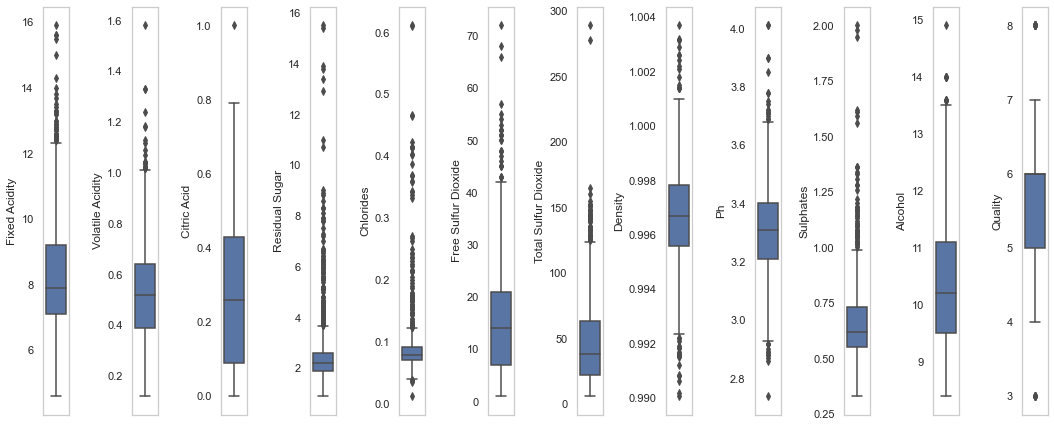

In [17]:
columns = [ col for col in data.columns if col not in [] ]
n_columns = len(data.columns)
fig, axes = plt.subplots(1, n_columns, figsize=(1.5 * n_columns, 7.5))
plt.subplots_adjust(wspace=2.5)
for index, col in enumerate(columns):
  ax = axes[int(index % n_columns)]
  ax.grid()
  sns.boxplot(data=data, y=col, ax=ax)
  ax.set_ylabel(col.title())

C:\Users\Gökçe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


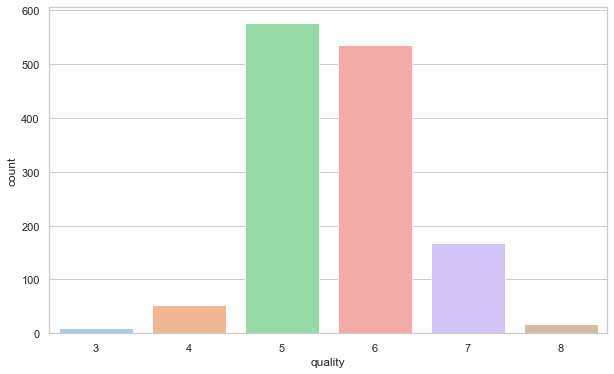

In [18]:
sns.set(style="whitegrid")
fig = plt.figure(figsize = (10,6))
sns.countplot('quality', data=data, palette='pastel');

In this part, we also can see the distribution of quality, too.

In [19]:
data.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

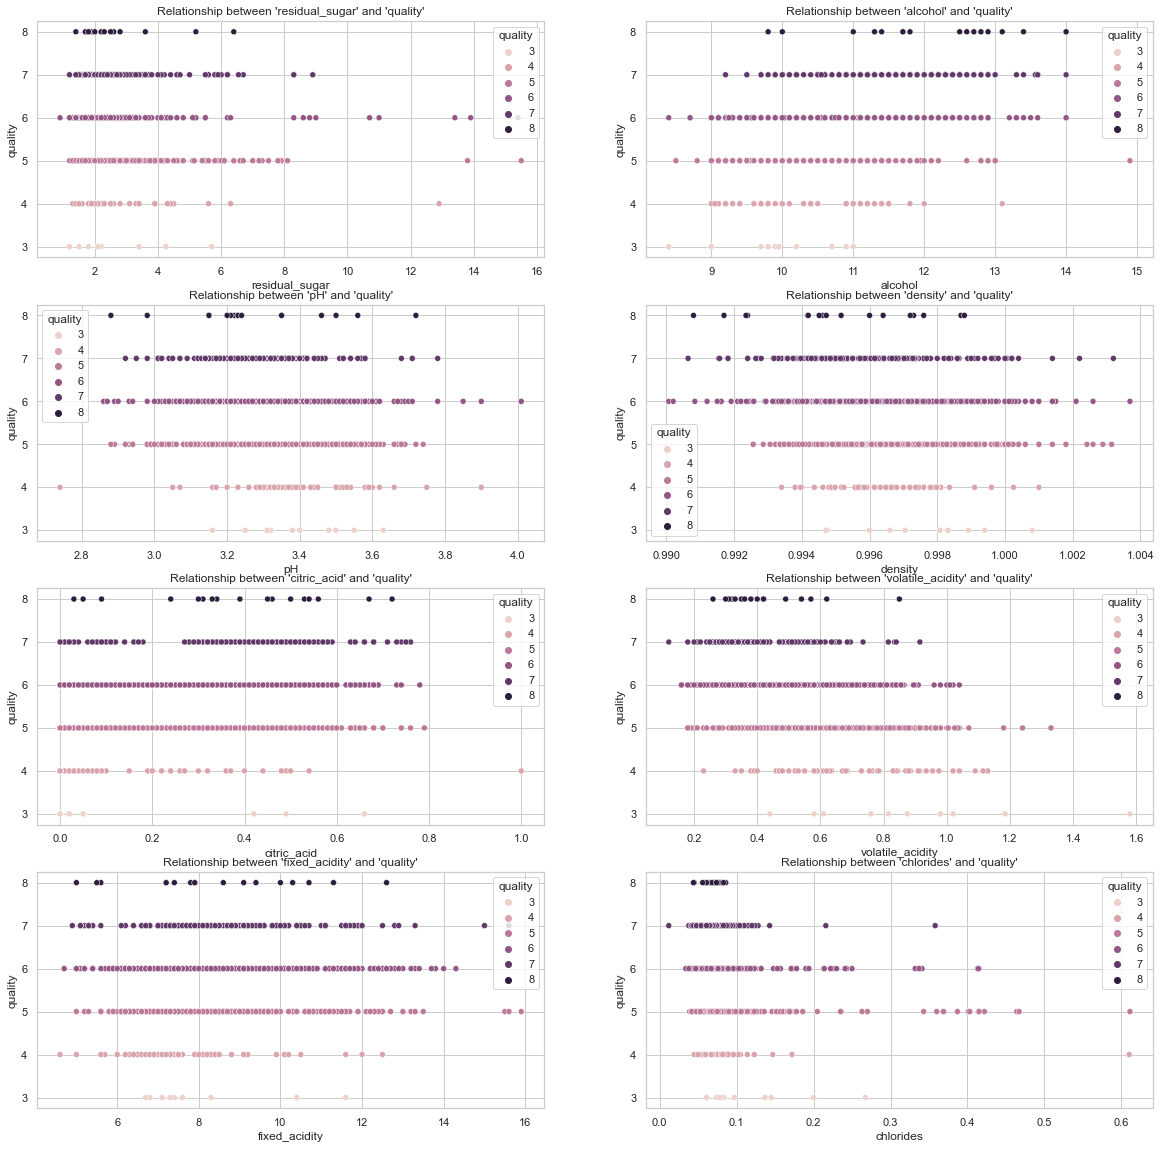

In [20]:
def quality_charts(data):

    fig, axes = plt.subplots(4, 2, figsize=(20,20))
    axes = axes.flatten()

    sns.scatterplot(ax = axes[0],
                    x = "residual_sugar",
                    y = "quality", hue = "quality",
                    data = data).set(title = "Relationship between 'residual_sugar' and 'quality'");

    sns.scatterplot(ax = axes[1],
                    x = "alcohol",
                    y = "quality", hue = "quality",
                    data = data).set(title = "Relationship between 'alcohol' and 'quality'");

    sns.scatterplot(ax = axes[2],
                    x = "pH",
                    y = "quality", hue = "quality",
                    data = data).set(title = "Relationship between 'pH' and 'quality'");

    sns.scatterplot(ax = axes[3],
                    x = "density",
                    y = "quality", hue = "quality",
                    data = data).set(title = "Relationship between 'density' and 'quality'");


    sns.scatterplot(ax = axes[4],
                    x = "citric_acid",
                    y = "quality", hue = "quality",
                    data = data).set(title = "Relationship between 'citric_acid' and 'quality'");

    sns.scatterplot(ax = axes[5],
                    x = "volatile_acidity",
                    y = "quality", hue = "quality",
                    data = data).set(title = "Relationship between 'volatile_acidity' and 'quality'");

    sns.scatterplot(ax = axes[6],
                    x = "fixed_acidity",
                    y = "quality", hue = "quality",
                    data = data).set(title = "Relationship between 'fixed_acidity' and 'quality'");        


    sns.scatterplot(ax = axes[7],
                    x = "chlorides",
                    y = "quality", hue = "quality",
                    data = data).set(title = "Relationship between 'chlorides' and 'quality'");    

quality_charts(data)

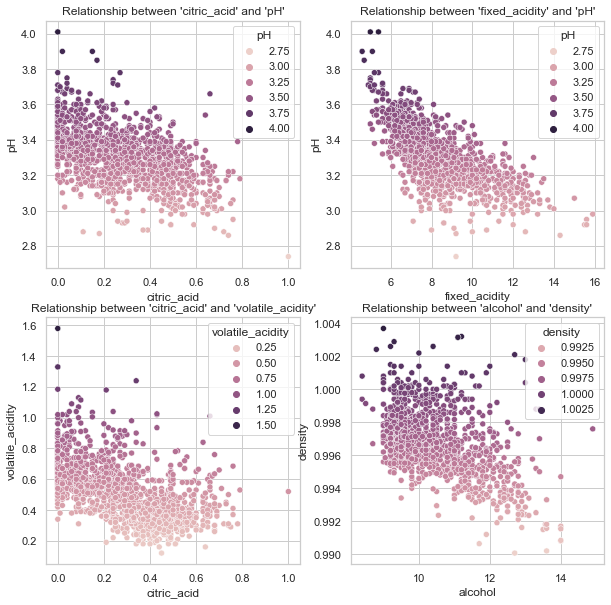

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0], x = "citric_acid",
                y = "pH",
                hue = "pH",
                data = data).set(title = "Relationship between 'citric_acid' and 'pH'")

sns.scatterplot(ax = axes[1], x = "fixed_acidity",
                y = "pH",
                hue = "pH",
                data = data).set(title = "Relationship between 'fixed_acidity' and 'pH'")
sns.scatterplot(ax = axes[2], x = "citric_acid",
                y = "volatile_acidity",
                hue = "volatile_acidity",
                data = data).set(title = "Relationship between 'citric_acid' and 'volatile_acidity'")

sns.scatterplot(ax = axes[3], x = "alcohol",
                y = "density",
                hue = "density",
                data = data).set(title = "Relationship between 'alcohol' and 'density'");

As we can see, there is correlation between 'citric_acid' and 'pH', 'fixed_acidity' and 'pH','citric_acid' and 'volatile_acidity','alcohol' and 'density' features.

RESAMPLING

In [22]:
df_3 = data[data.quality==3]          
df_4 = data[data.quality==4]              
df_5 = data[data.quality==5]     
df_6 = data[data.quality==6]     
df_7 = data[data.quality==7]     
df_8 = data[data.quality==8]

OVERSAMPLING FOR REGRESSION

In [23]:
df_3_upsampled = resample(df_3, replace=True, n_samples=600, random_state=12) 
df_4_upsampled = resample(df_4, replace=True, n_samples=600, random_state=12) 
df_7_upsampled = resample(df_7, replace=True, n_samples=600, random_state=12) 
df_8_upsampled = resample(df_8, replace=True, n_samples=600, random_state=12) 

# Decreases the rows of Majority one's to make balance data :
df_5_downsampled = data[data.quality==5].sample(n=600, replace=True).reset_index(drop=True)
df_6_downsampled = data[data.quality==6].sample(n=600, replace=True).reset_index(drop=True)

COMBINE FOR REGRESSION PROBLEM

In [24]:
df_regression = pd.concat([df_3_upsampled, df_4_upsampled, df_7_upsampled, 
                         df_8_upsampled, df_5_downsampled, df_6_downsampled]).reset_index(drop=True)

In [25]:
df_regression.quality.value_counts()

3    600
4    600
7    600
8    600
5    600
6    600
Name: quality, dtype: int64

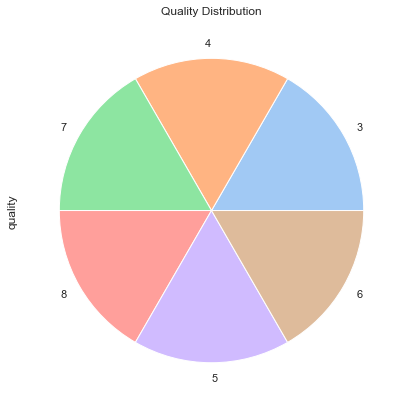

In [26]:
plt.figure(figsize=(7, 7))
_ = df_regression['quality'].value_counts().plot.pie(colors=sns.color_palette('pastel'))
plt.title("Quality Distribution");

We created new samples for each numerical point between 3-8.

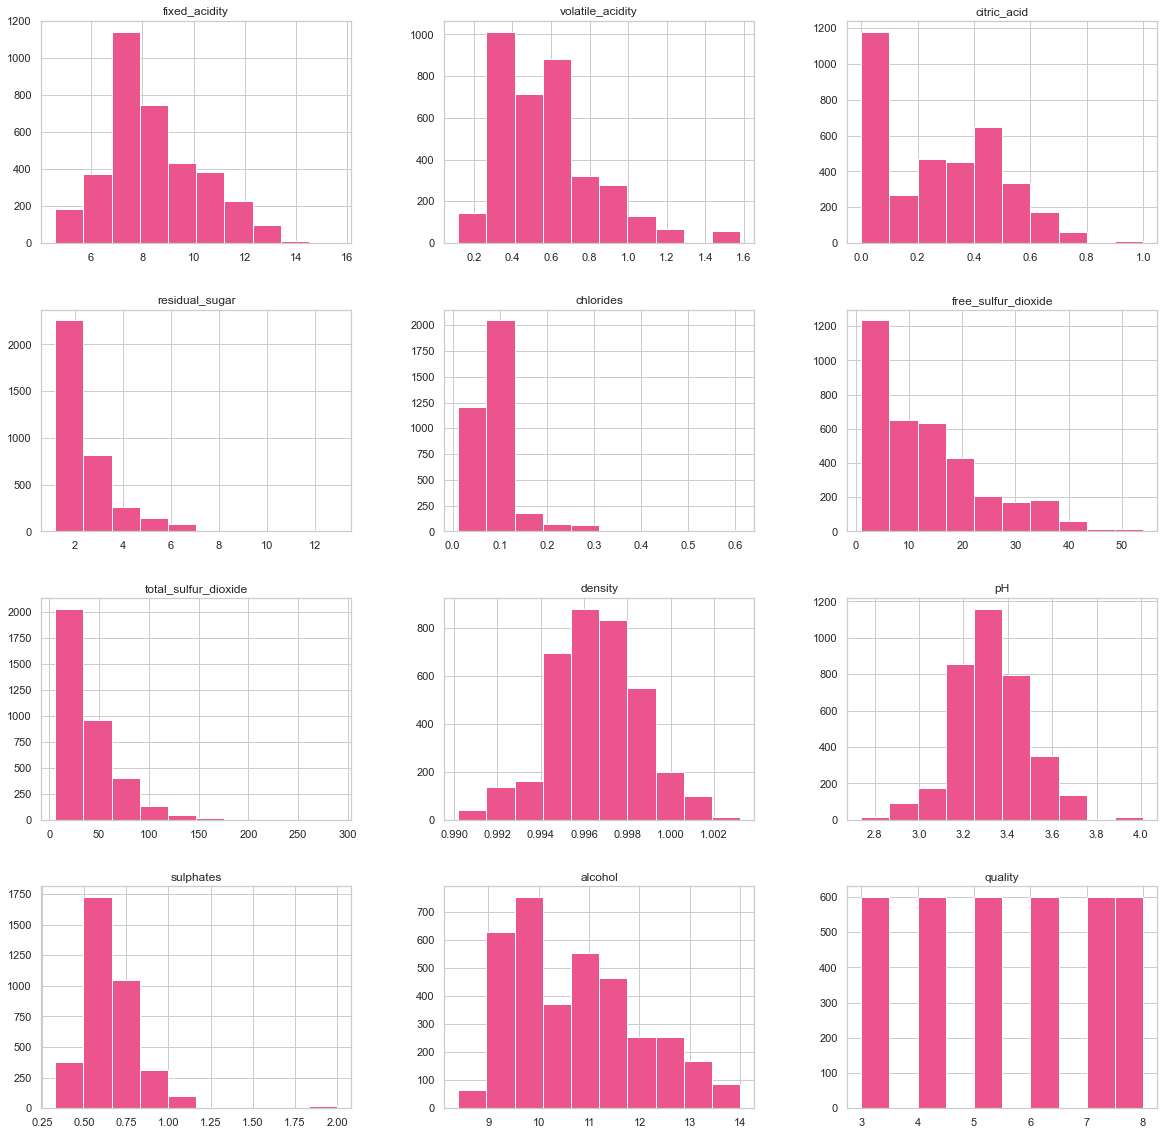

In [27]:
df_regression.hist(figsize=(20,20), color = "#EB548C")
plt.show()

After resampling, distribution and amount of values are changed. Most of them have a right 

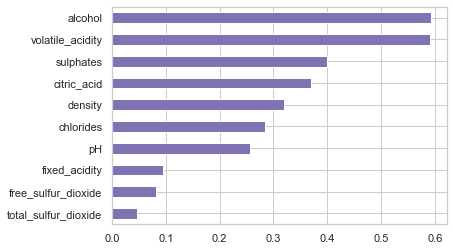

In [28]:
df_corr = df_regression.copy()
df_corr.corr().quality.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:11][::-1].plot(kind='barh',color='m') ;

OVERSAMPLING FOR CLASSIFICATION

In [29]:
df = pd.DataFrame(data)
df['Target'] = df['quality'].apply(lambda x: 0 if x <= 6.5 else 1)
df.drop(["quality"], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1359 non-null   float64
 1   volatile_acidity      1359 non-null   float64
 2   citric_acid           1359 non-null   float64
 3   residual_sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free_sulfur_dioxide   1359 non-null   float64
 6   total_sulfur_dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  Target                1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 170.3 KB


In [30]:
df["Target"].value_counts()

0    1175
1     184
Name: Target, dtype: int64

In [31]:
df_1 = df[df.Target==1]          
df_0 = df[df.Target==0]    
df_1_upsampled_c = resample(df_1, replace=True, n_samples=1000, random_state=12) 
df_0_downsampled_c = df[df.Target==0].sample(n=1000, replace=True).reset_index(drop=True)

In [32]:
df_classification = pd.concat([df_1_upsampled_c, df_0_downsampled_c]).reset_index(drop=True)

In [33]:
df_classification.Target.value_counts()

1    1000
0    1000
Name: Target, dtype: int64

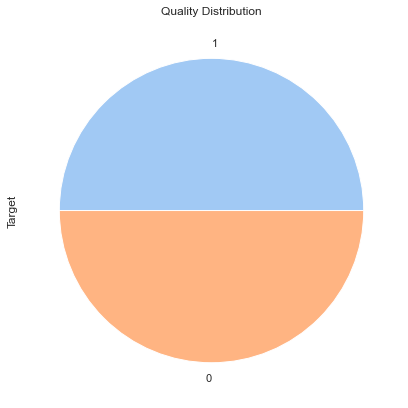

In [34]:
plt.figure(figsize=(7, 7))
_ =  df_classification.Target.value_counts().plot.pie(colors=sns.color_palette('pastel'))
plt.title("Quality Distribution");

We created new samples for each Good and Bad samples.

SCALING

We have two different dataframe as df_regression and df_classification.
Firstly, We start with splitting data as x and y.

In [35]:
y_regression = df_regression.quality
x_regression = df_regression.drop("quality", axis = 1)

In [36]:
y_classification = df_classification.Target
x_classification = df_classification.drop("Target", axis = 1)

We use 'MinMaxScaler' for normalizing. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between 0 and 1. we will not use 'StandardScaler', because our dataset is not normally distributed. 

In [37]:
scaler = MinMaxScaler()
x_regression = scaler.fit_transform(x_regression)
x_classification = scaler.fit_transform(x_classification)

In [38]:
features= df_regression.columns.tolist()

In [39]:
x_regression = pd.DataFrame(x_regression,columns=features[:-1])
x_classification = pd.DataFrame(x_classification,columns=features[:-1])

In [40]:
x_regression.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.200000,0.476027,0.00,0.000000,0.426421,0.283019,0.081272,0.346923,0.456693,0.107784,0.250000
1,0.527273,0.335616,0.49,0.076923,0.314381,0.075472,0.035336,0.707692,0.330709,0.179641,0.000000
2,0.254545,0.729452,0.00,0.260684,0.142140,0.075472,0.028269,0.492308,0.700787,0.125749,0.410714
3,0.527273,0.219178,0.42,0.025641,0.222408,0.622642,0.148410,0.624615,0.503937,0.317365,0.267857
4,0.527273,0.219178,0.42,0.025641,0.222408,0.622642,0.148410,0.624615,0.503937,0.317365,0.267857


In [41]:
x_classification.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.495413,0.130137,0.35,0.031746,0.105351,0.100000,0.077739,0.484076,0.393701,0.299401,0.500000
1,0.293578,0.150685,0.36,0.055556,0.088629,0.042857,0.014134,0.282643,0.417323,0.125749,0.500000
2,0.348624,0.150685,0.40,0.277778,0.071906,0.014286,0.010601,0.536624,0.503937,0.197605,0.571429
3,0.422018,0.143836,0.45,0.023810,0.075251,0.242857,0.109541,0.345541,0.346457,0.335329,0.482143
4,0.311927,0.178082,0.28,0.071429,0.090301,0.157143,0.084806,0.490446,0.385827,0.239521,0.232143


CLASSIFICATION 

TRAIN TEST SPLIT

In [42]:
X_train_c,X_test_c,y_train_c,y_test_c = train_test_split(x_classification,y_classification,test_size = 0.25, random_state =12345)

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [44]:
CV = 5

In [45]:
tree_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
log_model = LogisticRegression()
svc_model = SVC()
linear_svc_model = LinearSVC()
knn_model = KNeighborsClassifier()
xgbc_model = XGBClassifier()

In [46]:
model_list = [tree_model, rfc_model, log_model, svc_model, linear_svc_model, xgbc_model]

In [47]:
for model in model_list:
    train_predict = cross_val_predict(model, X_train_c, y_train_c, cv=CV)
    accuracy = accuracy_score(y_train_c, train_predict)
    print('Accuracy score of '+ model.__class__.__name__ + ":" +str(accuracy))

Accuracy score of DecisionTreeClassifier:0.95
Accuracy score of RandomForestClassifier:0.9593333333333334
Accuracy score of LogisticRegression:0.8166666666666667
Accuracy score of SVC:0.84
Accuracy score of LinearSVC:0.818
Accuracy score of XGBClassifier:0.954


In [48]:
y = [1, 2, 3, 4, 5]
tree_scores = cross_val_score(tree_model, X_train_c, y_train_c, cv=CV, scoring = "accuracy")
rfc_scores = cross_val_score(rfc_model, X_train_c, y_train_c, cv=CV, scoring = "accuracy")
log_scores = cross_val_score(log_model, X_train_c, y_train_c, cv=CV, scoring = "accuracy")
svc_scores = cross_val_score(svc_model, X_train_c, y_train_c, cv=CV, scoring = "accuracy")
linear_svc_scores = cross_val_score(linear_svc_model, X_train_c, y_train_c, cv=CV, scoring = "accuracy")
xgbc_scores = cross_val_score(xgbc_model, X_train_c, y_train_c, cv=CV, scoring = "accuracy")

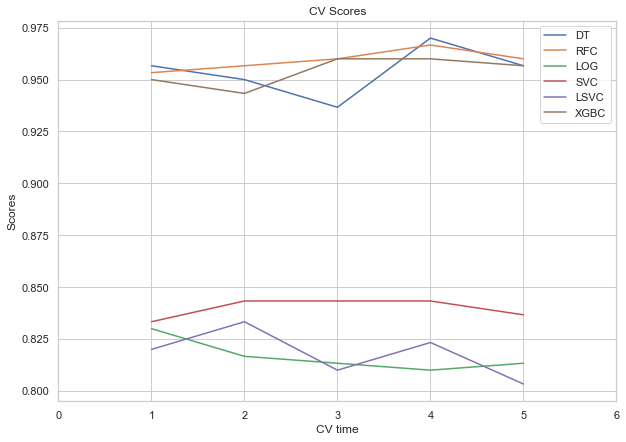

In [49]:
plt.figure(figsize=(10, 7))
plt.plot(y,tree_scores, label = "DT")
plt.plot(y,rfc_scores, label = "RFC")
plt.plot(y,log_scores, label = "LOG")
plt.plot(y,svc_scores, label = "SVC")
plt.plot(y,linear_svc_scores, label = "LSVC")
plt.plot(y,xgbc_scores, label = "XGBC")
plt.xlim(0,6)
plt.title("CV Scores")
plt.xlabel("CV time")
plt.ylabel("Scores")
plt.legend()
plt.show()

REGRESSION

TRAIN TEST SPLIT

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, LassoCV, RidgeCV
from xgboost import XGBRegressor

In [43]:
X_train_r,X_test_r,y_train_r,y_test_r = train_test_split(x_regression, y_regression, test_size = 0.25, random_state =12345)

In [52]:
linear_model = LinearRegression()
ridge_model = Ridge()
xgbr_model = XGBRegressor()

In [53]:
model_list_r = [linear_model, ridge_model, xgbr_model]

In [54]:
for model in model_list_r:
    train_predict = cross_val_predict(model, X_train_r, y_train_r, cv=CV)
    mae = mean_absolute_error(y_train_r, train_predict)
    print('MAE score of '+ model.__class__.__name__ + ":" +str(mae))
    print('Cross score of '+ model.__class__.__name__ + ":" +str(cross_val_score(model, X_train_r, y_train_r, cv=CV)))

MAE score of LinearRegression:0.7860701973409464
Cross score of LinearRegression:[0.69539881 0.67301984 0.6400847  0.6695557  0.6877705 ]
MAE score of Ridge:0.78982509941227
Cross score of Ridge:[0.69522698 0.67422789 0.64027238 0.66628178 0.68667636]
MAE score of XGBRegressor:0.11771303556583546
Cross score of XGBRegressor:[0.96173715 0.96496256 0.96575878 0.9622275  0.96682545]


The best predictor is XGBRegressor

Finding Best Parameter for classification

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
grid_xgb =  GridSearchCV(xgbc_model, params_xgb, cv=CV)

In [57]:
grid_xgb.fit(X_train_c, y_train_c)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.2, 0.5, 0.8, 1],
                         'n_estimators': [50, 100, 250, 400, 600, 800, 1000]})

In [58]:
param_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rfc_model, param_rf, cv=CV)

In [59]:
grid_rf.fit(X_train_c, y_train_c)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 200, 350, 500]})

In [60]:
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(tree_model, param_grid=para_dt, cv=CV)

In [61]:
grid_dt.fit(X_train_c, y_train_c)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_leaf': [1, 2, 4, 5, 10, 20, 30, 40, 80,
                                              100]})

In [62]:
print("parameters for XGBoost:", grid_xgb.best_params_)
print("parameters for Random Forest:", grid_rf.best_params_)
print("parameters for Decision Tree:", grid_dt.best_params_)

parameters for XGBoost: {'learning_rate': 0.2, 'n_estimators': 100}
parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 200}
parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 43, 'min_samples_leaf': 1}


Finding best parameters for regression

In [63]:
parameters = {'nthread':[4], 'objective':['reg:linear'],'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7], 'min_child_weight': [4], 'silent': [1], 'subsample': [0.7],
              'colsample_bytree': [0.7], 'n_estimators': [500]}
grid_xgbr = GridSearchCV(xgbr_model, parameters, cv = CV, n_jobs = 5, verbose=True)

In [64]:
grid_xgbr.fit(X_train_c, y_train_c)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[14:34:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:34:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             verbose=True)

In [65]:
print("parameters for XGBOOST Regression:", grid_dt.best_params_)

parameters for XGBOOST Regression: {'criterion': 'gini', 'max_depth': 43, 'min_samples_leaf': 1}


Time to define algorithms with best parameters

Classification part

parameters for XGBoost: {'learning_rate': 0.8} <br>
parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 200} <br>
parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 1}

In [66]:
tree_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 40, min_samples_leaf= 1)
rfc_model = RandomForestClassifier(min_samples_leaf= 2, n_estimators= 200)
xgbc_model = XGBClassifier(learning_rate = 0.8)

In [67]:
for clf in (tree_model, rfc_model, xgbc_model):
     clf.fit(X_train_c, y_train_c)
     y_pred = clf.predict(X_test_c)
     print(clf.__class__.__name__, accuracy_score(y_test_c, y_pred))

DecisionTreeClassifier 0.956
RandomForestClassifier 0.972
XGBClassifier 0.966


In [68]:
for clf in (tree_model, rfc_model, xgbc_model):
     score = cross_val_score(clf, X_train_c, y_train_c, cv=CV)
     print(clf.__class__.__name__, str(score))

DecisionTreeClassifier [0.95       0.94666667 0.92       0.96666667 0.96333333]
RandomForestClassifier [0.94333333 0.93666667 0.95666667 0.96       0.95      ]
XGBClassifier [0.94333333 0.93666667 0.95333333 0.97       0.94666667]


In [69]:
Model = ['DecisionTreeClassifier','RandomForestClassifier ','XGBClassifier ']
value = []
for i in [tree_model, rfc_model, xgbc_model]:
    eval = cross_val_score(estimator = i, X = X_test_c, y = y_test_c, cv = CV)
    value.append(eval.mean())
    
data = {'Models': Model , 'CrossValScore':  value  }
temp = pd.DataFrame(data)

In [70]:
temp

,Models,CrossValScore
0,DecisionTreeClassifier,0.836
1,RandomForestClassifier,0.882
2,XGBClassifier,0.880


Regression part

parameters for XGBOOST Regression: {'max_depth': 40}

In [71]:
xgbr_model = XGBRegressor(max_depth = 40)

In [72]:
eval_r = cross_val_score(xgbr_model, X_train_r, y_train_r, cv=CV)
print('Cross score of '+ model.__class__.__name__ + ":" +str(eval_r.mean()))

Cross score of XGBRegressor:0.9653527826888894


Create pickle files to record models.

In [73]:
with open('classification_model.pkl', 'wb') as f:
    pickle.dump(xgbc_model, f)

with open('regression_model.pkl', 'wb') as f:
    pickle.dump(xgbr_model, f)

In [47]:
with open('classification_data.pkl', 'wb') as f:
    pickle.dump(X_train_c, f)
with open('classification_label.pkl', 'wb') as f:
    pickle.dump(y_train_c, f)
with open('classification_test_data.pkl', 'wb') as f:
    pickle.dump(X_test_c, f)
with open('classification_test_label.pkl', 'wb') as f:
    pickle.dump(y_test_c, f)

In [48]:
with open('regression_data.pkl', 'wb') as f:
    pickle.dump(X_train_r, f)
with open('regression_label.pkl', 'wb') as f:
    pickle.dump(y_train_r, f)
with open('regression_test_data.pkl', 'wb') as f:
    pickle.dump(X_test_r, f)
with open('regression_test_label.pkl', 'wb') as f:
    pickle.dump(y_test_r, f)

In [51]:
X_test_c.shape

(500, 11)

In [52]:
y_test_c.shape

(500,)